In [1]:
import pandas as pd
import re
from itertools import chain
import seaborn as sns
# !pip3 install fuzzywuzzy
from fuzzywuzzy import fuzz

In [2]:
# ! pip install underthesea

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\MED\\medicine_sample.csv", sep='\t',header=1, encoding='utf-16le',engine='python')

In [4]:
df.rename_axis


<bound method NDFrame.rename_axis of            1    NGUYỄN VĂN BÌNH  61  c  ngoaitru  \
0          2        VÕ THỊ PHÀO  71  c  ngoaitru   
1          3    NGUYỄN BẢO QUỐC  38  c  ngoaitru   
2          4    NGUYỄN KHẮC ĐẠI  63  c  ngoaitru   
3          5  LƯU THỊ XUÂN DUNG  53  c  ngoaitru   
4          6    NGUYỄN NGỌC HẢI  63  c  ngoaitru   
...      ...                ...  .. ..       ...   
19948  19950      Trần Khánh An   3  c    noitru   
19949  19951       HÀ THỊ NHUNG  71  c    noitru   
19950  19952     Dương Đức Hành  48  c  ngoaitru   
19951  19953       PHAN THỊ QÚY  86  c  ngoaitru   
19952  19954   NGUYỄN THỊ CHIẾN  49  c  ngoaitru   

         Xã Thạch Trung, Thành phố Hà Tĩnh, Tỉnh Hà Tĩnh  Nam     904735195  \
0      thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...   Nữ  9.167535e+08   
1             Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận  Nam  2.593673e+09   
2      Thôn Yên Nghĩa Xã Thạch Lưu Huyện Thạch Hà Tỉn...  Nam  9.847100e+08   
3      Chất Thường, Xã

In [5]:
cols = ['ma_don_thuoc' , 'ten_benh_nhan', 'tuoi_benh_nhan', 'loai_don_thuoc', 'hinh_thuc_dieu_tri', 'dia_chi', 'gioi_tinh', 'so_dien_thoai_nguoi_kham_benh', 'can_nang', 'ngay_tai_kham', 'ma_so_the_bao_hiem_y_te', 'thong_tin_don_thuoc', 'so_luong', 'chuan_doan', 'don_vi_tinh', 'ten_thuoc', 'biet_duoc', 'don_cap_phat_thuoc', 'cach_dung','loi_dan','ten_bac_si','don_vi_quan_ly','tinh_thanh','quan_huyen','phuong_xa','ten_co_so_kham_chua_benh','dia_chi_co_so_kham_chua_benh','so_dien_thoai','ma_nha_cung_cap','created_at','updated_at','sold']
df = df.set_axis(cols, axis=1)

In [6]:
df.columns

Index(['ma_don_thuoc', 'ten_benh_nhan', 'tuoi_benh_nhan', 'loai_don_thuoc',
       'hinh_thuc_dieu_tri', 'dia_chi', 'gioi_tinh',
       'so_dien_thoai_nguoi_kham_benh', 'can_nang', 'ngay_tai_kham',
       'ma_so_the_bao_hiem_y_te', 'thong_tin_don_thuoc', 'so_luong',
       'chuan_doan', 'don_vi_tinh', 'ten_thuoc', 'biet_duoc',
       'don_cap_phat_thuoc', 'cach_dung', 'loi_dan', 'ten_bac_si',
       'don_vi_quan_ly', 'tinh_thanh', 'quan_huyen', 'phuong_xa',
       'ten_co_so_kham_chua_benh', 'dia_chi_co_so_kham_chua_benh',
       'so_dien_thoai', 'ma_nha_cung_cap', 'created_at', 'updated_at', 'sold'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19953 entries, 0 to 19952
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ma_don_thuoc                   19953 non-null  int64  
 1   ten_benh_nhan                  19953 non-null  object 
 2   tuoi_benh_nhan                 19953 non-null  int64  
 3   loai_don_thuoc                 19953 non-null  object 
 4   hinh_thuc_dieu_tri             19953 non-null  object 
 5   dia_chi                        19953 non-null  object 
 6   gioi_tinh                      19953 non-null  object 
 7   so_dien_thoai_nguoi_kham_benh  19953 non-null  float64
 8   can_nang                       17771 non-null  float64
 9   ngay_tai_kham                  1611 non-null   float64
 10  ma_so_the_bao_hiem_y_te        13341 non-null  object 
 11  thong_tin_don_thuoc            19953 non-null  object 
 12  so_luong                       19953 non-null 

# Tên thuốc

In [10]:
df.ten_thuoc=df.ten_thuoc.astype('string')

In [11]:
df = df.drop(df.loc[df.ten_thuoc.isnull() == True].index,axis = 0)

In [12]:
df.reset_index(inplace=True)
df

,index,ma_don_thuoc,ten_benh_nhan,tuoi_benh_nhan,loai_don_thuoc,hinh_thuc_dieu_tri,dia_chi,gioi_tinh,so_dien_thoai_nguoi_kham_benh,can_nang,...,tinh_thanh,quan_huyen,phuong_xa,ten_co_so_kham_chua_benh,dia_chi_co_so_kham_chua_benh,so_dien_thoai,ma_nha_cung_cap,created_at,updated_at,sold
0,0,2,VÕ THỊ PHÀO,71,c,ngoaitru,"thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...",Nữ,9.167535e+08,NaN,...,58,582,22753,BỆNH VIỆN Y DƯỢC CỔ TRUYỀN NINH THUẬN,Số 05 Lê Hồng Phong - Phường Mỹ Hương - Thành ...,0259 3820668,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
1,1,3,NGUYỄN BẢO QUỐC,38,c,ngoaitru,"Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận",Nam,2.593673e+09,62.0,...,58,587,22870,TRUNG TÂM Y TẾ HUYỆN NINH PHƯỚC,Chung Mỹ - Thị trấn Phước Dân - Huyện Ninh Phư...,919301156,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
2,2,4,NGUYỄN KHẮC ĐẠI,63,c,ngoaitru,Thôn Yên Nghĩa Xã Thạch Lưu Huyện Thạch Hà Tỉn...,Nam,9.847100e+08,53.0,...,42,436,18091,BV PHỔI TỈNH HÀ TĨNH,- Phường Thạch Quý - Thành phố Hà Tĩnh - Tỉnh ...,2393681368,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
3,3,5,LƯU THỊ XUÂN DUNG,53,c,ngoaitru,"Chất Thường, Xã Phước Hậu, Huyện Ninh Phước, N...",Nữ,0.000000e+00,62.0,...,58,587,22882,BỆNH VIỆN LAO VÀ BỆNH PHỔI TỈNH NINH THUẬN,Quốc lộ 1A - Xã Phước Thuận - Huyện Ninh Phước...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
4,4,6,NGUYỄN NGỌC HẢI,63,c,ngoaitru,"Phường Kinh Dinh, Thành phố Phan Rang-Tháp Chà...",Nam,1.234568e+08,NaN,...,58,586,22834,BỆNH VIỆN ĐA KHOA HUYỆN NINH HẢI,93 Phạm Ngọc Thạch - Thị trấn Khánh Hải - Huyệ...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19947,19948,19950,Trần Khánh An,3,c,noitru,"Thôn Bái DươngXã Tuy Lộc, TP Yên Bái, Yên Bái",Nữ,8.288830e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19948,19949,19951,HÀ THỊ NHUNG,71,c,noitru,"Xã Chí Tiên, Huyện Thanh Ba, Phú Thọ",Nữ,3.681266e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19949,19950,19952,Dương Đức Hành,48,c,ngoaitru,"thôn 8aXã Việt Cường, Huyện Trấn Yên, Yên Bái",Nam,9.654773e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19950,19951,19953,PHAN THỊ QÚY,86,c,ngoaitru,"Phường Hồng Hà, TP Yên Bái, Yên Bái",Nữ,8.699523e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN


Split Tên thuốc

In [13]:
def split(a):
    tam = []
    split = []
    s = 0
    for i in range(len(a)):
        if (a[i] == ',') and not(re.match(r'\d',a[i+1])) and(a[i+1] != ' '):
            tam.append(a[s:i])
            s= i+1
#             print(s)
        if i == (len(a)-1):
            tam.append(a[s:i+1])
    return tam

In [14]:
#Chia tên thuốc vào từng đơn
import re
don_thuoc = []
for i in range(len(df)):
    don_thuoc.append(split(df.ten_thuoc[i]))

In [15]:
don_thuoc

[['Phyllantol (2020)',
  'Dưỡng cốt Khải Hà (2020)',
  'Phong thấp Khải Hà (2020)',
  'Bổ trung ích khí – f (2020)',
  'Tioga Liquid (2020)',
  'Bổ huyết ích não (2020)',
  'An thần bổ tâm (2020)'],
 ['Omeprazol 20mg',
  'Paracetamol (acetaminophen) 500mg',
  'Ketoprofen 75mg',
  'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
  'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg'],
 ['Vitamin 3B-PV', 'Atiliver Diệp hạ châu'],
 ['Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều'],
 ['Cinnarizin 25mg',
  'Losartan Kali 50mg',
  'Meloxicam 7,5mg',
  'Glucosamin 500mg',
  'Omeprazol 20mg',
  'Acetylsalicylic acid 81mg'],
 ['Natri clorid 0,9% 500ml 0,9%/500ml',
  'Diaphyllin Venosum 4,8%,5ml',
  'Glucose 5% 250ml 5%,250ml',
  'Taxibiotic 2000 2g',
  'Preforin injection 40mg',
  'Paratriam 200mg Powder 200mg',
  'RACIPER 20MG 20mg'],
 ['Piracetam (Neu-stam 800) 800mg',
  'Paracetamol (acetaminophen) (Panactol 650) 650mg',
  'Vitamin B1 + B6 + B12 (Neurotrivit) 100mg + 2

In [16]:
vcd = pd.DataFrame(don_thuoc)
vcd.to_csv('df_don_thuoc_1.csv', index=False)

In [17]:
vcd

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,Phyllantol (2020),Dưỡng cốt Khải Hà (2020),Phong thấp Khải Hà (2020),Bổ trung ích khí – f (2020),Tioga Liquid (2020),Bổ huyết ích não (2020),An thần bổ tâm (2020),None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Omeprazol 20mg,Paracetamol (acetaminophen) 500mg,Ketoprofen 75mg,Magnesi hydroxyd + nhôm hydroxyd + simethicon ...,Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Vitamin 3B-PV,Atiliver Diệp hạ châu,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,"Budesonid + formoterol (160mcg + 4,5 mcg); 120...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Cinnarizin 25mg,Losartan Kali 50mg,"Meloxicam 7,5mg",Glucosamin 500mg,Omeprazol 20mg,Acetylsalicylic acid 81mg,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19947,Cefamandol 1g,Pulmicort Respules,Biofil,Nước cất tiêm,Zensalbu nebules 5.0,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19948,Bạch thược,Bình vôi (Ngải tượng),Cam thảo,Câu kỷ tử,Cẩu tích,Đại táo,Đỗ trọng,Đương quy (Toàn quy),Kê huyết đằng,Ngũ gia bì chân chim,...,None,None,None,None,None,None,None,None,None,None
19949,Meza-Calci D3,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
19950,Meza-Calci D3,Hoạt Huyết Phúc Hưng,Fenostad 200,"Ramifix 2,5",None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [18]:
ten_thuoc = list(chain.from_iterable(don_thuoc))
ten_thuoc

['Phyllantol (2020)',
 'Dưỡng cốt Khải Hà (2020)',
 'Phong thấp Khải Hà (2020)',
 'Bổ trung ích khí – f (2020)',
 'Tioga Liquid (2020)',
 'Bổ huyết ích não (2020)',
 'An thần bổ tâm (2020)',
 'Omeprazol 20mg',
 'Paracetamol (acetaminophen) 500mg',
 'Ketoprofen 75mg',
 'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
 'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg',
 'Vitamin 3B-PV',
 'Atiliver Diệp hạ châu',
 'Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều',
 'Cinnarizin 25mg',
 'Losartan Kali 50mg',
 'Meloxicam 7,5mg',
 'Glucosamin 500mg',
 'Omeprazol 20mg',
 'Acetylsalicylic acid 81mg',
 'Natri clorid 0,9% 500ml 0,9%/500ml',
 'Diaphyllin Venosum 4,8%,5ml',
 'Glucose 5% 250ml 5%,250ml',
 'Taxibiotic 2000 2g',
 'Preforin injection 40mg',
 'Paratriam 200mg Powder 200mg',
 'RACIPER 20MG 20mg',
 'Piracetam (Neu-stam 800) 800mg',
 'Paracetamol (acetaminophen) (Panactol 650) 650mg',
 'Vitamin B1 + B6 + B12 (Neurotrivit) 100mg + 200mg + 200mcg',
 'Sulpirid (Stadpiz

In [19]:
from collections import Counter
counter_ten_thuoc = list(chain.from_iterable(Counter(ten_thuoc).items()))
counter_ten_thuoc

['Phyllantol (2020)',
 4,
 'Dưỡng cốt Khải Hà (2020)',
 29,
 'Phong thấp Khải Hà (2020)',
 16,
 'Bổ trung ích khí – f (2020)',
 1,
 'Tioga Liquid (2020)',
 1,
 'Bổ huyết ích não (2020)',
 34,
 'An thần bổ tâm (2020)',
 22,
 'Omeprazol 20mg',
 73,
 'Paracetamol (acetaminophen) 500mg',
 361,
 'Ketoprofen 75mg',
 34,
 'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
 11,
 'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg',
 43,
 'Vitamin 3B-PV',
 16,
 'Atiliver Diệp hạ châu',
 25,
 'Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều',
 3,
 'Cinnarizin 25mg',
 51,
 'Losartan Kali 50mg',
 24,
 'Meloxicam 7,5mg',
 163,
 'Glucosamin 500mg',
 15,
 'Acetylsalicylic acid 81mg',
 42,
 'Natri clorid 0,9% 500ml 0,9%/500ml',
 157,
 'Diaphyllin Venosum 4,8%,5ml',
 19,
 'Glucose 5% 250ml 5%,250ml',
 5,
 'Taxibiotic 2000 2g',
 43,
 'Preforin injection 40mg',
 57,
 'Paratriam 200mg Powder 200mg',
 39,
 'RACIPER 20MG 20mg',
 55,
 'Piracetam (Neu-stam 800) 800mg',
 82,
 'Paracetamol (a

In [20]:
X = counter_ten_thuoc[::2]
Y = counter_ten_thuoc[1::2]

In [21]:
count_ten_thuoc = pd.DataFrame({'ten_thuoc' : X, 'count_thuoc': Y})

In [22]:
count_ten_thuoc

,ten_thuoc,count_thuoc
0,Phyllantol (2020),4
1,Dưỡng cốt Khải Hà (2020),29
2,Phong thấp Khải Hà (2020),16
3,Bổ trung ích khí – f (2020),1
4,Tioga Liquid (2020),1
...,...,...
5171,Eumovate Cream,1
5172,Lamivudine/Efaviren/Tenofovir/300/300/400,1
5173,"Nước muối sinh lý Natri clorid 0,9%",1
5174,Basethyrox,1


In [23]:
count_ten_thuoc = count_ten_thuoc.sort_values(by=['count_thuoc'],ascending=False)
top20_count_ten_thuoc = count_ten_thuoc.head(20)
top20_count_ten_thuoc

,ten_thuoc,count_thuoc
1593,Nước cất tiêm,1586
2490,"Natri Clorid 0,9% [0,9%/500ml]",1356
2493,"Natri clorid 0,9% [0,9%-100ml]",1058
175,Nước cất tiêm 10ml,1023
4848,PymeFERON B9,991
2434,HAISAMIN,825
1897,"Sodium Chloride(Natri Chlorid )0,9%, 500 ml",737
773,"Natri clorid 0,9% [0,9%-500ml]",618
2570,Seduxen 5mg [Diazepam 5mg],584
777,A.T Famotidine 40 inj,574


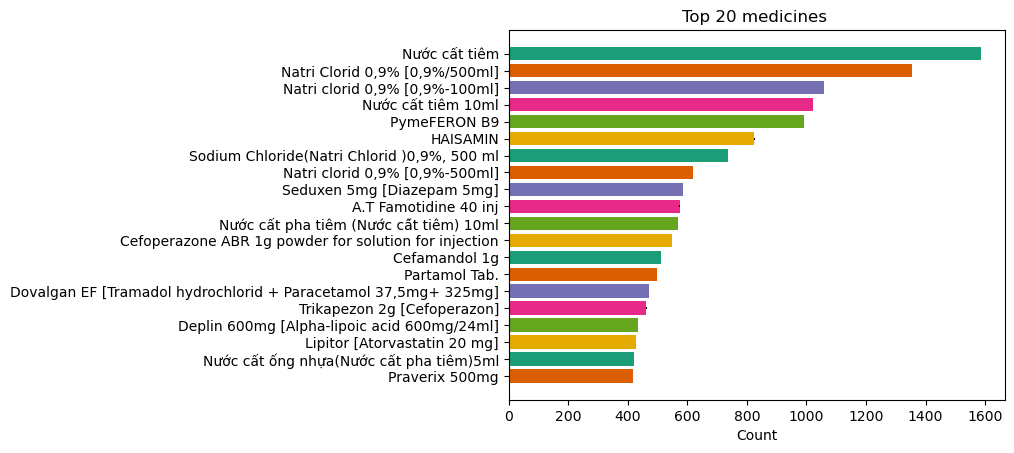

In [24]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
tenthuoc = list(top20_count_ten_thuoc.ten_thuoc)
y_pos = np.arange(len(tenthuoc))
performance = 3 + 10 * np.random.rand(len(tenthuoc))
error = np.random.rand(len(tenthuoc))
colors = plt.cm.Dark2(range(6))
ax.barh(y_pos, top20_count_ten_thuoc.count_thuoc, xerr=error, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(tenthuoc)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 20 medicines ')
plt.savefig('Top 20 medicines.png')
plt.show()

Task :
1. Thuốc X được nơi nào mua nhiều nhất?
2. Nơi Y tiêu thụ thuốc nào nhiều nhất?


# Nơi Y tiêu thụ thuốc nào nhiều nhất?

In [25]:
df_codetinhthanh = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\MED\\tinhthanh.csv")

In [26]:
df_codetinhthanh
# df_codetinhthanh=df_codetinhthanh.set_index('code')

,code,tinhthanh
0,1,Thành phố Hà Nội
1,2,Tỉnh Hà Giang
2,4,Tỉnh Cao Bằng
3,6,Tỉnh Bắc Kạn
4,8,Tỉnh Tuyên Quang
...,...,...
59,92,Thành phố Cần Thơ
60,93,Tỉnh Hậu Giang
61,94,Tỉnh Sóc Trăng
62,95,Tỉnh Bạc Liêu


In [27]:
def code_tinh(code_num):
    code_num = int(code_num)
    name = df_codetinhthanh.loc[df_codetinhthanh.code == code_num].tinhthanh
    return name.values

In [28]:
def statis_province(name_column,name):
    
    #name_column gồm : tinh_thanh , quan_huyen, phuong_xa
    #name : tên tỉnh / tên quận huyện / tên phường xã
    
    block = df.loc[df[name_column] == name]
    don_thuoc = []
    for i in block.index:
        don_thuoc.append(split(block.ten_thuoc[i]))
    ten_thuoc_test = list(chain.from_iterable(don_thuoc))
    counter_ten_thuoc_test = list(chain.from_iterable(Counter(ten_thuoc_test).items()))
    X_test = counter_ten_thuoc_test[::2]
    Y_test = counter_ten_thuoc_test[1::2]
    count_ten_thuoc_test = pd.DataFrame({'ten_thuoc' : X_test, 'count_thuoc': Y_test})
    count_ten_thuoc_test = count_ten_thuoc_test.sort_values(by=['count_thuoc'],ascending=False)
    top20_count_ten_thuoc = count_ten_thuoc_test.head(20)
       
    
    # Plot
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    tenthuoc = list(top20_count_ten_thuoc.ten_thuoc)
    y_pos = np.arange(len(tenthuoc))
    performance = 3 + 10 * np.random.rand(len(tenthuoc))
    error = np.random.rand(len(tenthuoc))
    colors = plt.cm.Dark2(range(6))
    ax.barh(y_pos, top20_count_ten_thuoc.count_thuoc, xerr=error, align='center', color = colors)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(tenthuoc)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Count')
    ax.set_title('Top 20 medicines ' + 'Huyện Cẩm Xuyên - Tỉnh Hà Tĩnh')
    plt.savefig('Top 20 medicines Huyện Cẩm Xuyên - Tỉnh Hà Tĩnh.png' )
    plt.show()
    print(top20_count_ten_thuoc)

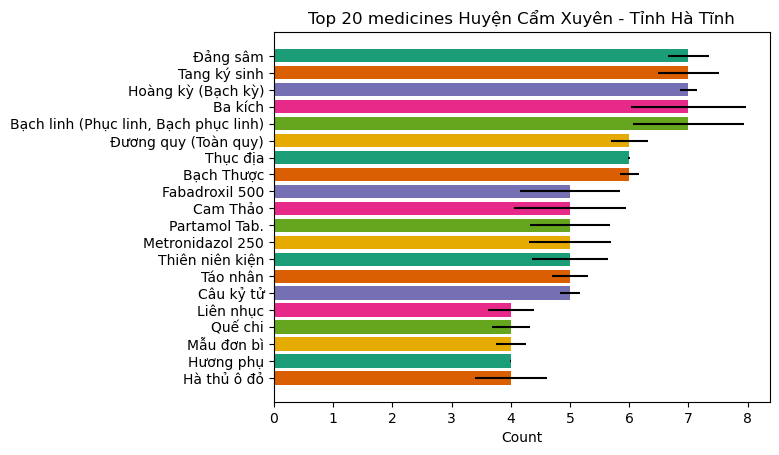

                                ten_thuoc  count_thuoc
18                               Đảng sâm            7
29                           Tang ký sinh            7
23                     Hoàng kỳ (Bạch kỳ)            7
12                                Ba kích            7
14  Bạch linh (Phục linh, Bạch phục linh)            7
20                   Đương quy (Toàn quy)            6
33                               Thục địa            6
15                             Bạch Thược            6
0                          Fabadroxil 500            5
16                               Cam Thảo            5
2                           Partamol Tab.            5
1                        Metronidazol 250            5
31                        Thiên niên kiện            5
30                               Táo nhân            5
17                              Câu kỷ tử            5
25                              Liên nhục            4
28                                Quế chi            4
27        

In [29]:
statis_province('quan_huyen','446')

# Thuốc X được nơi nào mua nhiều nhất?

In [30]:
don_thuoc_task1 = don_thuoc
ten_thuoc_task1 = list(chain.from_iterable(don_thuoc_task1))
ten_thuoc_task1[len(ten_thuoc_task1)-1]

'Tatanol'

In [31]:
# X_task1 = counter_ten_thuoc_task1[::2]
# Y_task1 = counter_ten_thuoc_task1[1::2]
# counter_ten_thuoc_task1 = pd.DataFrame({'ten_thuoc' : X_task1, 'count_thuoc': Y_task1})
# # counter_ten_thuoc_task1['tinh_thanh'] = df.ten_thuoc.str.extract(':')

In [32]:
tam = [1]*(len(ten_thuoc_task1))
counter_ten_thuoc_task1 = pd.DataFrame({'ten_thuoc':tam , 'tinh_thanh' : tam})
don_thuoc_task1 = don_thuoc
tam = 0
for i in range(len(don_thuoc_task1)):
    for j in range(len(don_thuoc_task1[i])):
            counter_ten_thuoc_task1.ten_thuoc[j + tam] = don_thuoc_task1[i][j]
            counter_ten_thuoc_task1.tinh_thanh[j + tam] = df.tinh_thanh[i]
    tam = tam + len(don_thuoc_task1[i])
#         print(don_thuoc_task1[i][j])
counter_ten_thuoc_task1['count'] = 1
counter_ten_thuoc_task1

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ten_thuoc,tinh_thanh,count
0,Phyllantol (2020),58,1
1,Dưỡng cốt Khải Hà (2020),58,1
2,Phong thấp Khải Hà (2020),58,1
3,Bổ trung ích khí – f (2020),58,1
4,Tioga Liquid (2020),58,1
...,...,...,...
74116,"Ramifix 2,5",15,1
74117,Cetampir 800,15,1
74118,Fabafixim 200 DT,15,1
74119,Hoạt Huyết Phúc Hưng,15,1


In [33]:
task1 = counter_ten_thuoc_task1.sort_values(by='ten_thuoc', ascending=False)
task1.head(80)
task1_count= task1.groupby(['ten_thuoc','tinh_thanh']).count()
task1_count = task1_count.reset_index(inplace=False)
task1_count['boolean']=task1_count.duplicated(subset=['ten_thuoc'])

In [34]:
task1_count

,ten_thuoc,tinh_thanh,count,boolean
0,(NMI Heralbumin),31,5,False
1,-BỘ DÂY TRUYỀN ĐẾM GỌT,22,3,False
2,"-BỘ DÂY TRUYỀN ĐẾM GỌT,10%HB DIGIC(GLUTATHION+...",22,1,False
3,.. (Albucare),31,1,False
4,..(A.T Ambroxol),31,5,False
...,...,...,...,...
5595,Ống nội khí quản số các số có bóng,22,1,False
5596,Ống silicone nuôi ăn đường mũi dạ dày có phễu ...,22,1,False
5597,Ống silicone nuôi ăn đường mũi dạ dày có phễu ...,22,2,False
5598,Ống đặt nội khí quản có bóng các số,22,1,False


In [35]:
task1_count.loc[task1_count.boolean == True]

,ten_thuoc,tinh_thanh,count,boolean
53,3BTP,25,10,True
75,ACRIPTEGA,40,1,True
87,AGILOSART-H 100/25,40,1,True
106,ASPIRIN 81mg,58,9,True
143,Acetylcystein,40,10,True
...,...,...,...,...
5563,Đảng sâm,42,7,True
5576,Đỗ trọng,25,12,True
5577,Đỗ trọng,42,3,True
5582,Độc hoạt,25,4,True


In [37]:
task1_count.loc[task1_count.ten_thuoc == 'Đỗ trọng'].sort_values(by=['count'],ascending=True)

,ten_thuoc,tinh_thanh,count,boolean
5577,Đỗ trọng,42,3,True
5576,Đỗ trọng,25,12,True
5575,Đỗ trọng,15,38,False


In [38]:
df.loc[df.tinh_thanh == '58']

,index,ma_don_thuoc,ten_benh_nhan,tuoi_benh_nhan,loai_don_thuoc,hinh_thuc_dieu_tri,dia_chi,gioi_tinh,so_dien_thoai_nguoi_kham_benh,can_nang,...,tinh_thanh,quan_huyen,phuong_xa,ten_co_so_kham_chua_benh,dia_chi_co_so_kham_chua_benh,so_dien_thoai,ma_nha_cung_cap,created_at,updated_at,sold
0,0,2,VÕ THỊ PHÀO,71,c,ngoaitru,"thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...",Nữ,9.167535e+08,NaN,...,58,582,22753,BỆNH VIỆN Y DƯỢC CỔ TRUYỀN NINH THUẬN,Số 05 Lê Hồng Phong - Phường Mỹ Hương - Thành ...,0259 3820668,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
1,1,3,NGUYỄN BẢO QUỐC,38,c,ngoaitru,"Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận",Nam,2.593673e+09,62.0,...,58,587,22870,TRUNG TÂM Y TẾ HUYỆN NINH PHƯỚC,Chung Mỹ - Thị trấn Phước Dân - Huyện Ninh Phư...,919301156,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
3,3,5,LƯU THỊ XUÂN DUNG,53,c,ngoaitru,"Chất Thường, Xã Phước Hậu, Huyện Ninh Phước, N...",Nữ,0.000000e+00,62.0,...,58,587,22882,BỆNH VIỆN LAO VÀ BỆNH PHỔI TỈNH NINH THUẬN,Quốc lộ 1A - Xã Phước Thuận - Huyện Ninh Phước...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
4,4,6,NGUYỄN NGỌC HẢI,63,c,ngoaitru,"Phường Kinh Dinh, Thành phố Phan Rang-Tháp Chà...",Nam,1.234568e+08,NaN,...,58,586,22834,BỆNH VIỆN ĐA KHOA HUYỆN NINH HẢI,93 Phạm Ngọc Thạch - Thị trấn Khánh Hải - Huyệ...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
6,6,8,PHẠM CƯỜNG,64,c,ngoaitru,"kp8, Phường Đông Hải, Thành phố Phan Rang-Tháp...",Nam,9.465701e+08,67.0,...,58,582,22741,BỆNH VIỆN CHUYÊN KHOA DA LIỄU-TÂM THẦN,số 30 Phạm Ngũ Lão - Phường Phước Mỹ - Thành p...,2593823039,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15723,15724,15726,ĐỔNG VĂN ĐỊNH,34,c,ngoaitru,"Thị trấn Phước Dân, Huyện Ninh Phước, Ninh Thuận",Nam,3.679377e+08,59.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:45,3/28/2021 7:45,NaN
15733,15734,15736,TRẦN THỊ DUNG,66,c,ngoaitru,"lạc sơn 3, Xã Cà Ná, Huyện Thuận Nam, Ninh Thuận",Nữ,3.527317e+08,50.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:40,3/28/2021 7:40,NaN
15734,15735,15737,NGUYỄN THỊ ĐỨC,67,c,ngoaitru,"Xã Thành Hải, Thành phố Phan Rang-Tháp Chàm, N...",Nữ,3.347117e+08,43.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:40,3/28/2021 7:40,NaN
15750,15751,15753,TRẦN VƯƠNG,39,c,ngoaitru,"Xã Mỹ Sơn, Huyện Ninh Sơn, Ninh Thuận",Nam,9.463923e+08,51.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:35,3/28/2021 7:35,NaN


In [39]:
task1_count.loc[task1_count.boolean == True].head(80)

,ten_thuoc,tinh_thanh,count,boolean
53,3BTP,25,10,True
75,ACRIPTEGA,40,1,True
87,AGILOSART-H 100/25,40,1,True
106,ASPIRIN 81mg,58,9,True
143,Acetylcystein,40,10,True
...,...,...,...,...
1140,Cephalexin 500mg,42,7,True
1152,Cerecaps,22,2,True
1153,Cerecaps,25,70,True
1154,Cerecaps,31,15,True


# Tên bệnh

In [8]:
df_icd = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\MED\\ICD_10.csv", sep=',',header=1, encoding='utf-16le',engine='python')


In [9]:
df_icd

,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,.1,Bệnh tả,Bệnh tả.1
0,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh tả,"Bệnh tả do Vibrio cholerae 01, typ sinh học ch..."
1,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh tả,"Bệnh tả do Vibrio cholerae 01, typ sinh học eltor"
2,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh tả,"Bệnh tả, không đặc hiệu"
3,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh thương hàn và phó thương hàn,Bệnh thương hàn và phó thương hàn
4,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh thương hàn và phó thương hàn,Thương hàn
...,...,...,...,...,...,...
12213,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng (các) thuốc chống lao
12214,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng đa thuốc kháng vi sinh vật
12215,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng thuốc kháng vi sinh vật xác định khác
12216,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng các thuốc kháng vi sinh vật không xác định


In [10]:
cols = ['ten_chuong' , 'ten_nhom_chinh', 'ten_nhom_phu1', 'ten_nhom_phu2', 'ten_loai', 'ten_benh']
df_icd = df_icd.set_axis(cols, axis=1)
df_icd

,ten_chuong,ten_nhom_chinh,ten_nhom_phu1,ten_nhom_phu2,ten_loai,ten_benh
0,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh tả,"Bệnh tả do Vibrio cholerae 01, typ sinh học ch..."
1,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh tả,"Bệnh tả do Vibrio cholerae 01, typ sinh học eltor"
2,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh tả,"Bệnh tả, không đặc hiệu"
3,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh thương hàn và phó thương hàn,Bệnh thương hàn và phó thương hàn
4,Bệnh nhiễm trùng và ký sinh trùng,Bệnh nhiễm trùng đường ruột,,,Bệnh thương hàn và phó thương hàn,Thương hàn
...,...,...,...,...,...,...
12213,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng (các) thuốc chống lao
12214,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng đa thuốc kháng vi sinh vật
12215,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng thuốc kháng vi sinh vật xác định khác
12216,Mã phục vụ những mục đích đặc biệt,Kháng các thuốc kháng sinh và chống ung thư,,,Kháng các thuốc kháng sinh khác,Kháng các thuốc kháng vi sinh vật không xác định


In [11]:
for i in range(len(df)):
    print(df.chuan_doan[i])

thoái hóa cột sống
Chấn thương cột sống
A15-Lao hô hấp, có xác nhận về vi khuẩn học và mô học ; (K75)Bệnh viêm gan ; (N19)Suy thận; (E64.9) Nhược sức
Bệnh phổi tắc nghẽn mãn tính, không phân loại
Bệnh lý tăng huyết áp
Viêm phổi, không phân loại/ chưa loại trừ lao tái phát
Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan
Suy thận mạn khác,[N18.5]Suy thận mạn, giai đoạn 5
Đau bụng không xác định và đau bụng khác
Viêm dạ dày - ruột và đại tràng khác do nhiễm trùng và không xác định,Đau bụng và vùng chậu,Xơ vữa động mạch chủ
Mày đay tiếp xúc
Bệnh suy nhược thần kinh
H25-Đục thủy tinh thể người già
.
Rối loạn chức năng tiền đình
Mộng thịt
Bệnh lý tăng huyết áp
H40-Glôcôm
Rối loạn chuyển hóa lipoprotein và tình trạng tăng lipid máu khác,Cơn đau thắt ngực,Đau khớp,Đa niệu,Hoa mắt và chóng mặt,Tăng nồng độ Glucoza máu,Bệnh Tăng huyết áp vô văn (nguyên phát)
H25-Đục thủy tinh thể người già
Mày đay
Bệnh quai bị,Viêm tuyến nước bọt
Xuất huyết não ngày thứ 2,Suy tim,Tăng huyết áp,Suy yếu

Thủy đậu
Viêm âm hộ cấp
Viêm họng cấp, không đặc hiệu
Đau bụng không xác định và đau bụng khác,Viêm dạ dày-ruột và viêm đại tràng khác không nhiễm trùng khác
M51.1† - Bệnh của đĩa đệm đốt sống thắt lưng và các đốt sống khác có kèm tổn thương của rễ tủy sống (G55.1*)
Tổn thương nông tại cổ chân và bàn chân
M47 - thoái hóa cột sống
Viêm họng cấp
Bệnh đái tháo đường không phụ thuộc insuline
Bệnh đái tháo đường không phụ thuộc insuline
Bệnh đái tháo đường không phụ thuộc insuline
J31.0 - Viêm mũi mãn tính
Viêm phế quản cấp
K29 - Viêm dạ dày và tá tràng
Viêm họng cấp
Viêm phế quản cấp
Vết thương hở tại cổ chân và bàn chân
Quản lý sinh sản
Đau ngực khác,Viêm phế quản cấp
Bệnh đái tháo đường không phụ thuộc insuline
Bệnh lý tăng huyết áp
.
Viêm phế quản phổi.
Bệnh đái tháo đường tuýp 2.viêm gan ổn định, suy nhược cơ thể
Đơn thuốc ra viện
N39.0 - Nhiễm khuẩn hệ tiết niệu, vị trí không xác định
Viêm họng cấp
Viêm mũi họng cấp [cảm thường]
Viêm họng cấp
thoái hóa cột sống
Vết thương hở đầu gối

U ác trực tràng
Gút cấp - Tăng huyết áp - Rối loạn lipid máu
Ung thư phổi giai đoạn 4 ( giai đọan muộn) di căn màng phổi, carcinoma tuyến EGFR (+) tại exon 19;Bệnh trào ngược dạ dày - thực quản;Các thoái hoá đa khớp
Viêm phúc mạc;Loét dạ dày (Cấp có thủng)/ K hạ họng;COVID-19 nghi ngờ hoặc có thể (chưa có kết quả xét nghiệm khẳng định SARS-CoV-2)
Suy hô hấp cấp;Suy tim;Bệnh lý tăng huyết áp
Nhiễm trùng đường ruột do vi khuẩn, không xác định loài
ĐTĐ thai kỳ thai lần 3- 34 tuần
Bệnh đái tháo đường Tuýp 2 (không phụ thuộc insulin),Tăng lipid máu, không đặc hiệu,Rối loạn chức năng tiền đình,Cơn đau thắt ngực,Cao huyết áp vô căn (nguyên phát)
Nhồi máu não ngày thứ 2 - THA - ĐTĐ typ 2 - Rối loạn lipid máu
Viêm dạ dày và tá tràng
Rối loạn tích luỹ lipid khác,Bệnh lý tăng huyết áp,Viêm gan mạn, không đặc hiệu,Bệnh đái tháo đường không phụ thuộc insuline
Viêm phúc mạc;Loét dạ dày (Cấp có thủng)/ K hạ họng;COVID-19 nghi ngờ hoặc có thể (chưa có kết quả xét nghiệm khẳng định SARS-CoV-2)
Vi

Viêm họng cấp
Viêm phổi, tác nhân không xác định
Bệnh tim thiếu máu cục bộ mạn
Viêm kết mạc
Viêm dạ dày và tá tràng
Tổn thương cột sống ; ĐTĐ 2 ; THA;thoái hoá cột sống
Tiêu chảy rối loạn chức năng
Viêm thanh quản cấp,Viêm phổi, tác nhân không xác định
ÁP XE VÙNG KHUỶU TAY P
u vùng mông; ĐTĐ 2; THA
Sau mổ cắt đoạn dạ dày ngày thứ 4; TD cơn đau thắt ngực không ổn địn
Gai Xương gót
Viêm phổi, tác nhân không xác định
Bệnh lý tăng huyết áp
Viêm họng cấp
ung thư di căn nhiều nơi CRNF
Nhồi máu não- TD hội chứng vành cấp/ THA- NMN cũ
Viêm dạ dày và tá tràng
Viêm thanh quản cấp,Viêm phổi, tác nhân không xác định
Tiêu chảy rối loạn chức năng
Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan
Bệnh lý tăng huyết áp
Viêm phổi, tác nhân không xác định
U ác của phế quản và phổi
Nhồi máu não cấp giờ thứ 1,5 - THA - ĐTĐ typ 2 - TD CĐTN - Rung nhĩ
K hạ họng M hạch cổ
Tiêu chảy rối loạn chức năng
Bệnh lý tăng huyết áp
Viêm xoang mạn tính
Viêm kết mạc
Gãy xương đùi
Viêm thanh quản cấp,Viêm phổi, 

Viêm màng bao sụn tai ngoài viêm màng sụn vành tai (T)
Ung thư phổi PT2N2M0
Sau mổ ghép khuyết sọ bắng xương tự thân.
Nhồi máu cơ tim cấp đã đặt stent RCA;THA;Bệnh trào ngược dạ dày - thực quản;tăng men gan;suy tim
Sỏi túi mật có viêm túi mật khác
Viêm phổi - Suy tim - THA - Rung nhĩ cơn - TD CĐTN
TD viêm ruột thừa cấp/ Tiền sử PT dạ dày
Viêm phổi, tràn dịch màng phổi - TD U phổi - XHTH nghi loét dạ dày, tá tràng
Shock nhiễm khuẩn đường vào hô hấp - Viêm phổi, tràn dịch màng phổi (P) - Theo dõi nhồi máu cơ tim cấp - Xuất huyết màng não - Theo dõi viêm màng não - Nhồi máu não ổ khuyết - Tăng Natri máu - Cúm B - TD Đái tháo đường - Gãy đầu trên xương đùi (P)/K phổi (P) giai đoạn muộn - Giãn não thất đã dẫn lưu não thất ổ bụng - Tăng huyết áp - Suy kiệt
Beta thalassaemia
sm cắt đại tràng phải do u đại tràng- td suy tim
U ác thực quản
suy tĩnh mạch hiển lớn phải -THA-ĐTĐ
Sau mổ khâu vết thương tầng sinh môn / tăng huyết áp
Trĩ nội độ III
Vết thương phức tạp bàn chân phải do TNLĐ
Xuất huyế

Đau bụng CRNN/ Sỏi mật - TS cắt RT và cắt dạ dày do loét 2005
Cơn nhịp nhanh kịch phát trên thất- TD CĐTN
Tăng sản tuyến tiền liệt;Bệnh tim, không xác định; tăng huyết áp
TD nhiễm khuẩn tiêu hóa - xơ gan mất bù
Viêm phổi do vi khuẩn, chưa được phân loại nơi khác;Cơn đau thắt ngực không ổn định;Bệnh lý tăng huyết áp;Bệnh đái tháo đường không phụ thuộc insuline
K trực tràng T3N2bMx đã phẫu thuật
Gist ruột non;Loạn sản tuyến tiền liệt
Vết thương bàn tay trái do TNRR
Vết thương lóc da ngón 2 gẫy đốt 3,đốt 1 ngón 2,gẫy đốt bàn 2, vết thương ngón 3 tay phải do bị chém
Chấn thương cẳng tay phải: gãy 1/3 dưới xương trụ, Vết thương rách da, gãy xương, đứt gân, tổn thương thần kinh,Vết thương rách da bung do bị chém
Đau bụng CRNN
Viêm tuỵ cấp / Sỏi đường mật.
Sốt chưa rõ nguyên nhân TD Tiêu chảy nhiễm khuẩn - Đái tháo đường - tăng huyết áp
Bệnh phổi tắc nghẽn mạn tính đợt cấp do bội nhiễm
U ác trực tràng đã PT (pT4N1M1) / hạ BC, TC
Xuất huyết tiêu hóa cao nghi do loét dạ dày-tá tràng chưa loại t

Sốc Giảm thể tích;Chảy máu tiêu hoá, không đặc hiệu;Loét dạ dày (Cấp có xuất huyết);Bệnh trào ngược dạ dày - thực quản;U ác tụy;U ác của đường mật, không xác định
Tăng lipid máu hỗn hợp,Viêm gan mạn, không đặc hiệu,Nhiễm khuẩn hệ tiết niệu, vị trí không xác định,Bệnh đái tháo đường không phụ thuộc insuline
Viêm xoang cấp
U mỡ lành tính của da và mô dưới da ở đầu, mặt và cổ
Tràn dịch khớp,Sưng khu trú, khối và cục ở chi dưới
Tăng lipid máu hỗn hợp,Viêm gan mạn, không đặc hiệu,Các biến đổi khác của thận và niệu quản, chưa được phân loại,Nhiễm khuẩn hệ tiết niệu, vị trí không xác định,Bệnh đái tháo đường không phụ thuộc insuline
Viêm gan mạn, không đặc hiệu,Bệnh đái tháo đường không phụ thuộc insuline
Tăng triglycerid máu đơn thuần,Viêm gan mạn, không đặc hiệu,Bệnh đái tháo đường không phụ thuộc insuline
Tăng lipid máu hỗn hợp,Viêm gan mạn, không đặc hiệu,Các biến đổi khác của thận và niệu quản, chưa được phân loại,Nhiễm khuẩn hệ tiết niệu, vị trí không xác định,Bệnh đái tháo đường khôn

Chấn thương sọ não; TD chấn thương ngực kín
Đa chấn thương/ chấn thương bụng kín :chấn thương gan/ chấn thương ngực kín/ K giáp
U ác của vú đã PT TD M phổi
TD xơ gan do HCV mạn + rượu/ Lao phổi cũ- sử dụng chất gây nghiện đã bỏ-THA
U ác tụy tiến triển M não- Bệnh trào ngược dạ dày - thực quản
Sốc nhiễm khuẩn;Sỏi ống mật có viêm đường mật;Viêm dạ dày và tá tràng;Viêm tụy cấp
Suy hô hấp cấp;Sốc nhiễm khuẩn;Viêm phổi do vi khuẩn, chưa được phân loại nơi khác;Suy tim;Nhồi máu cơ tim cấp;Gan xơ hóa và xơ gan;Các rối loạn đông máu đặc biệt khác;Nhồi máu cơ tim cấp
U ác của bàng quang
U ác của dạ dày
Khuyết xương sọ trán hai bên
Sau mổ lấy máu tụ DMC bán cầu trái
U ác của phế quản và phổi;Bệnh trào ngược dạ dày - thực quản
K đại tràng sigma pT4N0M0 - TD tái phát
Co giật di chứng chấn thương sọ não - viêm phổi/ Xơ gan - viêm gan B - suy tim
Viêm ruột
Viêm khớp dạng thấp/Viêm đau TK ngoại biên/ Viêm khớp thái dương hàm trái, viêm phổi cộng đồng, bệnh trào ngược dạ dày thực quản
Bệnh thận mạn tí

Hội chứng cánh tay cổ
Đau vùng cổ gáy
Đau lưng
Đau dây thần kinh tọa/Thoái hóa cột sống/Tăng huyết áp
U ác của sàn miệng đã PT
Đau lưng
Mày đay cấp
Đau dây thần kinh toạ
Chửa ngoài tử cung phải vỡ - đã phẫu thuật cắt khối chửa ngoài và vòi trứng phải
Liệt nửa người
U ác của tuyến giáp
Tiêu chảy cấp nhiễm khuẩn
Đau dây thần kinh toạ;Cơn thiếu máu não cục bộ thoáng qua và hội chứng liên quan
Đau lưng
Bệnh đái tháo đường không phụ thuộc insuline;Suy thận mãn tính;Rối loạn chuyển hoá lipoprotein và tình trạng tăng lipid máu khác
Viêm phúc mạc do thủng bàng quang đã phẫu thuật- viêm phổi - suy thận cấp - nhiễm trùng tiết niệu - viêm màng não di chứng liệt 2 chi dưới - suy tim
U ác buồng trứng đã PT TD tiến triển
Nhồi máu não- U tuyến yên -sa sút trí tuệ - Hẹp mạch cảnh trái- Giật cơ có nguonf gốc vỏ não/Tăng huyết áp-Đột quỵ não cũ
Đau lưng
TD viêm dạ day / Sỏi đường mật.
TD Hội chứng ngưng rượu- Tâm thần phân liệt.
Đau bụng CRNN- TD Sỏi đường mật
Bệnh đái tháo đường không phụ thuộc insulin

In [12]:
df.chuan_doan=df.chuan_doan.astype('string')

 Split Tên Bệnh

In [25]:
def split_ten_benh(a):
    tam = []
    split = []
    s = 0
    for i in range(len(a)):
        if (a[i] == ',') or ((a[i] == ';')):
            str_split = a[s:i]
            tam.append(str_split.strip())
            s= i+1
#             print(s)
        if i == (len(a)-1):
            str_split = a[s:i+1]
            tam.append(str_split.strip())
    return tam

In [26]:
#Chia tên thuốc vào từng đơn
import re
chuan_doan = []
for i in range(len(df)):
    chuan_doan.append(split_ten_benh(df.chuan_doan[i]))

In [27]:
df.chuan_doan[2]

'A15-Lao hô hấp, có xác nhận về vi khuẩn học và mô học ; (K75)Bệnh viêm gan ; (N19)Suy thận; (E64.9) Nhược sức'

In [28]:
chuan_doan

[['thoái hóa cột sống'],
 ['Chấn thương cột sống'],
 ['A15-Lao hô hấp',
  'có xác nhận về vi khuẩn học và mô học',
  '(K75)Bệnh viêm gan',
  '(N19)Suy thận',
  '(E64.9) Nhược sức'],
 ['Bệnh phổi tắc nghẽn mãn tính', 'không phân loại'],
 ['Bệnh lý tăng huyết áp'],
 ['Viêm phổi', 'không phân loại/ chưa loại trừ lao tái phát'],
 ['Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan'],
 ['Suy thận mạn khác', '[N18.5]Suy thận mạn', 'giai đoạn 5'],
 ['Đau bụng không xác định và đau bụng khác'],
 ['Viêm dạ dày - ruột và đại tràng khác do nhiễm trùng và không xác định',
  'Đau bụng và vùng chậu',
  'Xơ vữa động mạch chủ'],
 ['Mày đay tiếp xúc'],
 ['Bệnh suy nhược thần kinh'],
 ['H25-Đục thủy tinh thể người già'],
 ['.'],
 ['Rối loạn chức năng tiền đình'],
 ['Mộng thịt'],
 ['Bệnh lý tăng huyết áp'],
 ['H40-Glôcôm'],
 ['Rối loạn chuyển hóa lipoprotein và tình trạng tăng lipid máu khác',
  'Cơn đau thắt ngực',
  'Đau khớp',
  'Đa niệu',
  'Hoa mắt và chóng mặt',
  'Tăng nồng độ Glucoza máu

['thoái hóa cột sống',
 'Chấn thương cột sống',
 'A15-Lao hô hấp',
 'có xác nhận về vi khuẩn học và mô học',
 '(K75)Bệnh viêm gan',
 '(N19)Suy thận',
 '(E64.9) Nhược sức',
 'Bệnh phổi tắc nghẽn mãn tính',
 'không phân loại',
 'Bệnh lý tăng huyết áp',
 'Viêm phổi',
 'không phân loại/ chưa loại trừ lao tái phát',
 'Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan',
 'Suy thận mạn khác',
 '[N18.5]Suy thận mạn',
 'giai đoạn 5',
 'Đau bụng không xác định và đau bụng khác',
 'Viêm dạ dày - ruột và đại tràng khác do nhiễm trùng và không xác định',
 'Đau bụng và vùng chậu',
 'Xơ vữa động mạch chủ',
 'Mày đay tiếp xúc',
 'Bệnh suy nhược thần kinh',
 'H25-Đục thủy tinh thể người già',
 '.',
 'Rối loạn chức năng tiền đình',
 'Mộng thịt',
 'Bệnh lý tăng huyết áp',
 'H40-Glôcôm',
 'Rối loạn chuyển hóa lipoprotein và tình trạng tăng lipid máu khác',
 'Cơn đau thắt ngực',
 'Đau khớp',
 'Đa niệu',
 'Hoa mắt và chóng mặt',
 'Tăng nồng độ Glucoza máu',
 'Bệnh Tăng huyết áp vô văn (nguyên phát)

In [31]:
from collections import Counter
Counter(ten_benh)

Counter({'thoái hóa cột sống': 79,
         'Chấn thương cột sống': 11,
         'A15-Lao hô hấp': 1,
         'có xác nhận về vi khuẩn học và mô học': 7,
         '(K75)Bệnh viêm gan': 1,
         '(N19)Suy thận': 1,
         '(E64.9) Nhược sức': 1,
         'Bệnh phổi tắc nghẽn mãn tính': 17,
         'không phân loại': 421,
         'Bệnh lý tăng huyết áp': 835,
         'Viêm phổi': 327,
         'không phân loại/ chưa loại trừ lao tái phát': 3,
         'Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan': 116,
         'Suy thận mạn khác': 22,
         '[N18.5]Suy thận mạn': 3,
         'giai đoạn 5': 33,
         'Đau bụng không xác định và đau bụng khác': 139,
         'Viêm dạ dày - ruột và đại tràng khác do nhiễm trùng và không xác định': 3,
         'Đau bụng và vùng chậu': 25,
         'Xơ vữa động mạch chủ': 1,
         'Mày đay tiếp xúc': 1,
         'Bệnh suy nhược thần kinh': 48,
         'H25-Đục thủy tinh thể người già': 2,
         '.': 801,
         'Rối loạ

Kiểm tra nhóm bệnh

In [44]:
def check(a,b):
    KQ = []
    for i in range(len(b)):
        Partial_Ratio = fuzz.partial_ratio(a.lower(),b.ten_benh[i].lower())
        if Partial_Ratio == 100:
            KQ.append(b.ten_benh[i])
    return KQ

In [46]:
ten_benh = list(chain.from_iterable(chuan_doan))
ten_benh

['thoái hóa cột sống',
 'Chấn thương cột sống',
 'A15-Lao hô hấp',
 'có xác nhận về vi khuẩn học và mô học',
 '(K75)Bệnh viêm gan',
 '(N19)Suy thận',
 '(E64.9) Nhược sức',
 'Bệnh phổi tắc nghẽn mãn tính',
 'không phân loại',
 'Bệnh lý tăng huyết áp',
 'Viêm phổi',
 'không phân loại/ chưa loại trừ lao tái phát',
 'Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan',
 'Suy thận mạn khác',
 '[N18.5]Suy thận mạn',
 'giai đoạn 5',
 'Đau bụng không xác định và đau bụng khác',
 'Viêm dạ dày - ruột và đại tràng khác do nhiễm trùng và không xác định',
 'Đau bụng và vùng chậu',
 'Xơ vữa động mạch chủ',
 'Mày đay tiếp xúc',
 'Bệnh suy nhược thần kinh',
 'H25-Đục thủy tinh thể người già',
 '.',
 'Rối loạn chức năng tiền đình',
 'Mộng thịt',
 'Bệnh lý tăng huyết áp',
 'H40-Glôcôm',
 'Rối loạn chuyển hóa lipoprotein và tình trạng tăng lipid máu khác',
 'Cơn đau thắt ngực',
 'Đau khớp',
 'Đa niệu',
 'Hoa mắt và chóng mặt',
 'Tăng nồng độ Glucoza máu',
 'Bệnh Tăng huyết áp vô văn (nguyên phát)

In [ ]:
for i in ten_benh:
    print(check(i,df_icd))

['Cột sống', 'thoái hóa cột sống', 'thoái hóa cột sống khác kèm tổn thương tủy sống', 'thoái hóa cột sống khác có tổn thương rễ sống', 'Các thoái hóa cột sống khác', 'thoái hóa cột sống không đặc hiệu', 'Ho']
['Cột sống', 'Chấn thương cột sống']
[]
['Lao hô hấp, có xác nhận về vi khuẩn học và mô học']
[]
[]
[]
['Các bệnh phổi tắc nghẽn mãn tính khác', 'Bệnh phổi tắc nghẽn mãn tính đợt cấp do bội nhiễm', 'Bệnh phổi tắc nghẽn mãn tính đợt cấp, không phân loại', 'Bệnh phổi tắc nghẽn mãn tính, phân loại khác', 'Bệnh phổi tắc nghẽn mãn tính, không phân loại']
['U lympho tế bào T ngoại vi, không phân loại ở nơi khác', 'Rối loạn lúc dậy thì, không phân loại ở phần khác', 'Rối loạn hành vi và tâm thần kết hợp với thời kì sinh đẻ, không phân loại ở nơi khác', 'Rối loạn hành vi và tâm thần nhẹ kết hợp với thời kì sinh đẻ, không phân loại nơi khác', 'Rối loạn hành vi và tâm thần nặng kết hợp với thời kì sinh đẻ, không phân loại nơi khác', 'Các rối loạn hành vi và tâm thần khác kết hợp với thời kì

[]
['Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan']
['Suy thận mạn khác']
[]
['Suy thận mạn, giai đoạn 5']
['Đau bụng không xác định và đau bụng khác']
['Viêm dạ dày - ruột và đại tràng khác do nhiễm trùng và không xác định ']
['Đau bụng và vùng chậu']
['Xơ vữa động mạch', 'Xơ vữa động mạch chủ']
['Mày đay', 'Mày đay tiếp xúc']
['Bệnh suy nhược thần kinh']
['Đục thủy tinh thể người già']
['Áp xe phổi do amíp (J99.8*)', 'Lao hệ thần kinh, không xác định (G99.8*)', 'Lao tuyến thượng thận (E35.1*)', 'Hội chứng Waterhouse-Friderichsen (E35.1*)', 'Viêm kết mạc do chlamydia (H13.1*)', 'Viêm não St. Louis', 'Viêm não do enterovirus (G05.1*)', 'Viêm não do Adenovirus (G05.1*)', 'Viêm màng não do Enterovirus (G02.0*)', 'Viêm màng não do Adenovirus (G02.0*', 'Viêm màng não do virus Herpes G02.0', 'Viêm não do virus Herpes (G05.1*)', 'Viêm màng não do thủy đậu (G02.0*)', 'Viêm não do thủy đậu (G05.1*)', 'Viêm phổi do thủy đậu (J17.1*)', 'Viêm não do Zoster (G05.1*)', 'Viêm màng não 

['Rối loạn chức năng tiền đình', 'Rối loạn chức năng tiền đình khác', 'Rối loạn chức năng tiền đình, không đặc hiệu', 'Rối loạn chức năng tiền đình']
['Mộng thịt']
['Bệnh lý tăng huyết áp']
['Glôcôm']
['Rối loạn chuyển hóa lipoprotein và tình trạng tăng lipid máu khác', 'Tăng lipid máu khác']
['Cơn đau thắt ngực', 'Cơn đau thắt ngực không ổn định', 'Cơn đau thắt ngực do co thắt mạch', 'Dạng khác của cơn đau thắt ngực', 'Cơn đau thắt ngực, không đặc hiệu']
['Đau khớp']
['Đa niệu']
['Ho', 'Hoa mắt và chóng mặt']
['Tăng nồng độ Glucoza máu']
[]
['Đục thủy tinh thể người già']
['Mày đay', 'Mày đay dị ứng', 'Mày đay tự phát', 'Mày đay do lạnh và nóng', 'Mày đay do rung động', 'Mày đay do Cholin', 'Mày đay tiếp xúc', 'Mày đay khác', 'Mày đay, không đặc hiệu', 'Mày đay do ánh nắng']
['Bệnh quai bị', 'Bệnh quai bị với biến chứng khác', 'Bệnh quai bị không biến chứng']
['Viêm tuyến nước bọt']
[]
['Bệnh tim do tăng huyết áp, có suy tim (sung huyết)', 'Bệnh tim do tăng huyết áp, không suy tim (su

['Sốt xuất huyết Dengue']
['Đau dây thần kinh tọa', 'Đau lưng kèm đau dây thần kinh tọa']
['Viêm họng cấp', 'Viêm họng cấp do các vi sinh vật khác đã được xác định', 'Viêm họng cấp, không đặc hiệu']
['Áp xe phổi do amíp (J99.8*)', 'Lao hệ thần kinh, không xác định (G99.8*)', 'Lao tuyến thượng thận (E35.1*)', 'Hội chứng Waterhouse-Friderichsen (E35.1*)', 'Viêm kết mạc do chlamydia (H13.1*)', 'Viêm não St. Louis', 'Viêm não do enterovirus (G05.1*)', 'Viêm não do Adenovirus (G05.1*)', 'Viêm màng não do Enterovirus (G02.0*)', 'Viêm màng não do Adenovirus (G02.0*', 'Viêm màng não do virus Herpes G02.0', 'Viêm não do virus Herpes (G05.1*)', 'Viêm màng não do thủy đậu (G02.0*)', 'Viêm não do thủy đậu (G05.1*)', 'Viêm phổi do thủy đậu (J17.1*)', 'Viêm não do Zoster (G05.1*)', 'Viêm màng não do Zoster (G02.0*)', 'Sởi biến chứng viêm não G05.1', 'Sởi biến chứng viêm màng não G02.0', 'Sởi biến chứng viêm phổi J17.1', 'Sởi biến chứng viêm tai giữa H67.1', 'Viêm phổi do cytomegalovirus (J17.1*)', '

['Rối loạn điều tiết']
['Bệnh lý tăng huyết áp']
['Viêm họng cấp', 'Viêm họng cấp do các vi sinh vật khác đã được xác định', 'Viêm họng cấp, không đặc hiệu']
['Cơn thiếu máu não cục bộ thóang qua và hội chứng liên quan']
['Viêm dạ dày và tá tràng']
['Viêm phế quản cấp', 'Viêm phế quản cấp do Mycoplasma pneumoniae', 'Viêm phế quản cấp do Haemophilus lnfluenzae', 'Viêm phế quản cấp do streptococcus', 'Viêm phế quản cấp do virus coxsackie', 'Viêm phế quản cấp do virus parainfluenza', 'Viêm phế quản cấp do virus hợp bào hô hấp', 'Viêm phế quản cấp do rhinovirus', 'Viêm phế quản cấp do echovirus', 'Viêm phế quản cấp do vi sinh vật khác đã được định danh', 'Viêm phế quản cấp, không phân loại']
['Bệnh lý tăng huyết áp']
['Các bệnh phổi tắc nghẽn mãn tính khác', 'Bệnh phổi tắc nghẽn mãn tính đợt cấp do bội nhiễm', 'Bệnh phổi tắc nghẽn mãn tính đợt cấp, không phân loại', 'Bệnh phổi tắc nghẽn mãn tính, phân loại khác', 'Bệnh phổi tắc nghẽn mãn tính, không phân loại']
['U lympho tế bào T ngoại vi

['Viêm họng cấp', 'Viêm họng cấp do các vi sinh vật khác đã được xác định', 'Viêm họng cấp, không đặc hiệu']
['Bệnh lý tăng huyết áp']
['Viêm dạ dày khác']
['Bệnh đái tháo đường xác định khác']
['Cột sống', 'thoái hóa cột sống', 'thoái hóa cột sống khác có tổn thương rễ sống', 'Ho']
['Bệnh lý tăng huyết áp']
['Viêm phổi do thủy đậu (J17.1*)', 'Sởi biến chứng viêm phổi J17.1', 'Bệnh HIV dẫn đến viêm phổi do Pneumocystis jirovecii', 'Bệnh do HIV dẫn đến viêm phổi mô kẽ lympho bào', 'Viêm phổi do cytomegalovirus (J17.1*)', 'Cảm cúm với viêm phổi, virus cúm được định danh khác', 'Cúm kèm viêm phổi, virus không được định danh', 'Viêm phổi do virus, chưa được phân loại nơi khác', 'Viêm phổi do adenovirus', 'Viêm phổi do virus hợp bào hô hấp', 'Viêm phổi do virus parainfluenza', 'Viêm phổi do metapneumovirus người', 'Viêm phổi do virus khác', 'Viêm phổi virus, không đặc hiệu', 'Viêm phổi do phế cầu Streptococcus pneumoniae', 'Viêm phổi do phế cầu Streptococcus pneumoniae', 'Viêm phổi do vi kh

['Bệnh đái tháo đường không phụ thuộc insuline', 'Bệnh đái tháo đường không phụ thuộc insuline (Có hôn mê)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có nhiễm toan ceton)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng thận)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng mắt)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng thần kinh)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng mạch máu ngoại vi)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng xác định khác)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có đa biến chứng)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng không xác định khác)', 'Bệnh đái tháo đường không phụ thuộc insuline (Chưa có biến chứng)']
['Các rối loạn lo âu khác']
['Viêm họng cấp', 'Viêm họng cấp do các vi sinh vật khác đã được xác định', 'Viêm họng cấp, không đặc hiệu']
['Rối loạn chuyển hóa lipoprotein và tình trạng tăng lipid máu khác', 'Tăng lipid máu khác']


['Bệnh đái tháo đường không phụ thuộc insuline', 'Bệnh đái tháo đường không phụ thuộc insuline (Có hôn mê)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có nhiễm toan ceton)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng thận)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng mắt)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng thần kinh)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng mạch máu ngoại vi)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng xác định khác)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có đa biến chứng)', 'Bệnh đái tháo đường không phụ thuộc insuline (Có biến chứng không xác định khác)', 'Bệnh đái tháo đường không phụ thuộc insuline (Chưa có biến chứng)']
['Viêm họng cấp', 'Viêm họng cấp do các vi sinh vật khác đã được xác định', 'Viêm họng cấp, không đặc hiệu']
[]
[]
['Áp xe da, nhọt, nhọt cụm', 'Áp xe da, nhọt và cụm nhọt ở mặt', 'Áp xe da, nhọt, cụm nhọt ở cổ', 'Áp xe da, nhọt, 

['Bệnh hô hấp do hít hóa chất, khí, khói và chất bay hơi', 'Viêm phế quản và viêm phổi do hóa chất, chất khí, khói và chất bay hơi', 'Phù phổi do hóa chất, khí, khói và chất bay hơi', 'Viêm đường hô hấp trên do hóa chất, khí, khói và chất bay hơi, chưa phân loại nơi khác', 'Bệnh hô hấp cấp và bán cấp khác do hóa chất, khí, khói và chất bay hơi', 'Bệnh hô hấp mạn do hóa chât, khí, khói và chất bay hơi', 'Bệnh hô hấp khác do hóa chất, khí, khói và chất bay hơi', 'Bệnh hô hấp không phân loại do hóa chất, khí, khói và chất bay hơi']
['Nhiễm độc thức ăn do vi trùng khác, chưa phân loại nơi khác (NEC)', 'Bệnh loạn sản tủy và tăng sinh tủy, chưa phân loại nơi khác', 'Rối loạn liên quan đến cơ chế miễn dịch, chưa phân loại nơi khác', 'Rối loạn hệ tuần hoàn sau phẫu thuật, chưa phân loại nơi khác', 'Viêm đường hô hấp trên do hóa chất, khí, khói và chất bay hơi, chưa phân loại nơi khác', 'Các bệnh hô hấp sau can thiệp thủ thuật, chưa phân loại nơi khác', 'Các rối loạn liên quan đến đẻ non và nhẹ

['Đau bụng không xác định và đau bụng khác']
['Táo bón']
['Đau vú']
['Cơn đau thắt ngực']
['Rối loạn chức năng tiền đình', 'Rối loạn chức năng tiền đình']
['Đau vùng cổ gáy']
['Đau tai và chảy dịch ở tai', 'Đau tai']
['Viêm tai ngoài']
['Nút ráy tai']
['Chán ăn']
['Sâu răng']
['Bệnh tủy và mô quanh chân răng']
['Chán ăn']
['Bệnh đái tháo đường không phụ thuộc insuline']
['Tăng lipid máu khác']
['Bệnh tủy và mô quanh chân răng']
['Chán ăn']
['Đau khớp']
['Viêm mũi dị ứng khác']
[]
['Bệnh tả, không đặc hiệu', 'Bệnh lỵ trực khuẩn, không đặc hiệu', 'Bệnh ho gà, không đặc hiệu', 'Nhiễm khuẩn huyết não mô cầu không đặc hiệu', 'Nhiễm não mô cầu, không đặc hiệu', 'Nhiễm trùng huyết do liên cầu, không đặc hiệu', 'Nhiễm trùng do tụ cầu không đặc hiệu', 'Bệnh do actinomyces, không đặc hiệu', 'Bệnh do Nocardia, không đặc hiệu', 'Bệnh do Bartonella, không đặc hiệu', 'Nhiễm khuẩn, không đặc hiệu', 'Giang mai bẩm sinh muộn, không đặc hiệu', 'Giang mai bẩm sinh, không đặc hiệu', 'Giang mai sớm, không 

In [24]:
str1 = 'Nguyễn Văn Long bị đau xương khớp '
str2 = 'xương bị đau khớp'
Ratio = fuzz.ratio(str1.lower(),str2.lower())
Partial_Ratio = fuzz.partial_ratio(str1.lower(),str2.lower())
print(Ratio)
print(Partial_Ratio)

55
65


# Frequent itemset

In [53]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(don_thuoc).transform(don_thuoc)

In [54]:
don_thuoc

[['Phyllantol (2020)',
  'Dưỡng cốt Khải Hà (2020)',
  'Phong thấp Khải Hà (2020)',
  'Bổ trung ích khí – f (2020)',
  'Tioga Liquid (2020)',
  'Bổ huyết ích não (2020)',
  'An thần bổ tâm (2020)'],
 ['Omeprazol 20mg',
  'Paracetamol (acetaminophen) 500mg',
  'Ketoprofen 75mg',
  'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
  'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg'],
 ['Vitamin 3B-PV', 'Atiliver Diệp hạ châu'],
 ['Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều'],
 ['Cinnarizin 25mg',
  'Losartan Kali 50mg',
  'Meloxicam 7,5mg',
  'Glucosamin 500mg',
  'Omeprazol 20mg',
  'Acetylsalicylic acid 81mg'],
 ['Natri clorid 0,9% 500ml 0,9%/500ml',
  'Diaphyllin Venosum 4,8%,5ml',
  'Glucose 5% 250ml 5%,250ml',
  'Taxibiotic 2000 2g',
  'Preforin injection 40mg',
  'Paratriam 200mg Powder 200mg',
  'RACIPER 20MG 20mg'],
 ['Piracetam (Neu-stam 800) 800mg',
  'Paracetamol (acetaminophen) (Panactol 650) 650mg',
  'Vitamin B1 + B6 + B12 (Neurotrivit) 100mg + 2

In [ ]:
df_thuoc = pd.DataFrame(te_ary, columns=te.columns_)
test = df_thuoc.sample(1000)

In [ ]:
test

In [ ]:
df_thuoc.to_csv('df_don_thuoc.csv', index=False)

In [ ]:
# df_thuoc_01 = df_thuoc*1
# df_thuoc_01

In [ ]:
# pip install Orange3-Associate

In [ ]:
from orangecontrib.associate.fpgrowth import *

In [ ]:
te_ary = test.to_numpy()
(te_ary)

In [ ]:
itemsets_not1 = []
supports = []
for itemset, support in frequent_itemsets(te_ary, 0.01):
    if (len(itemset) >= 2):
        itemsets_not1.append(itemset)
        supports.append(support)
        print(str(itemset) + ", " + str(support))

In [ ]:
def rename_frozenset(frozensets):
    a = list(frozensets)
    name = []
    for i in range(len(a)):
        name.append(test.columns[a[i]])
    return name


frequent_itemsets_med = pd.DataFrame({'itemsets':itemsets_not1 , 'supports' : supports})
for i in range(len(frequent_itemsets_med)):
    frequent_itemsets_med.itemsets[i] = rename_frozenset(frequent_itemsets_med.itemsets[i])

In [ ]:
for i in range(len(itemsets_not1)):
    print("<<<<" + str(rename_frozenset(itemsets_not1[i])) + " >>>> Support: " + str(supports[i]))

In [ ]:
itemsets = dict(frequent_itemsets(te_ary, 0.01))

In [ ]:
itemsets

In [ ]:
rules = association_rules(itemsets, .05)
rules = list(rules)

In [ ]:
test.columns[4698]
rules[0][:-2][0]

In [ ]:
rules

In [ ]:
def rename_frozenset_rules(frozensets_rules):
    name = []
    tam = frozensets_rules[:-2]
    for i in range(len(tam)):
        a = rename_frozenset(tam[i])
        name.append(a)
        if i != (len(tam)-1):
            name.append("===>")
    b = frozensets_rules[-2:]
    index = ['sup','conf']
    name = name + index + [b]
    return name

In [ ]:
for i in rules:
    print(rename_frozenset_rules(i))

In [ ]:
rename_frozenset_rules(rules[0])